In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, text='ABCDE', org=(50,300),
                fontFace=font, fontScale=5, color=(255,255,255),
                thickness=25, lineType=cv2.LINE_AA)
    return blank_img

In [3]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

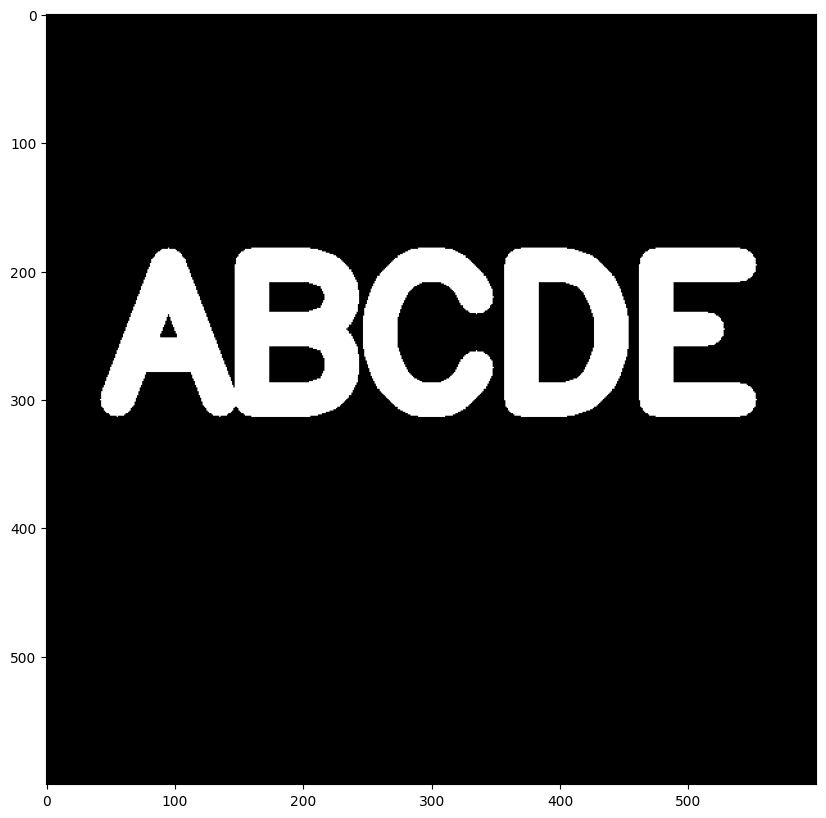

In [4]:
img = load_img()
display_img(img)

In [5]:
kernel = np.ones((5,5), dtype=np.uint8)
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [6]:
iterations = 5
result = cv2.erode(img, kernel, iterations=iterations)

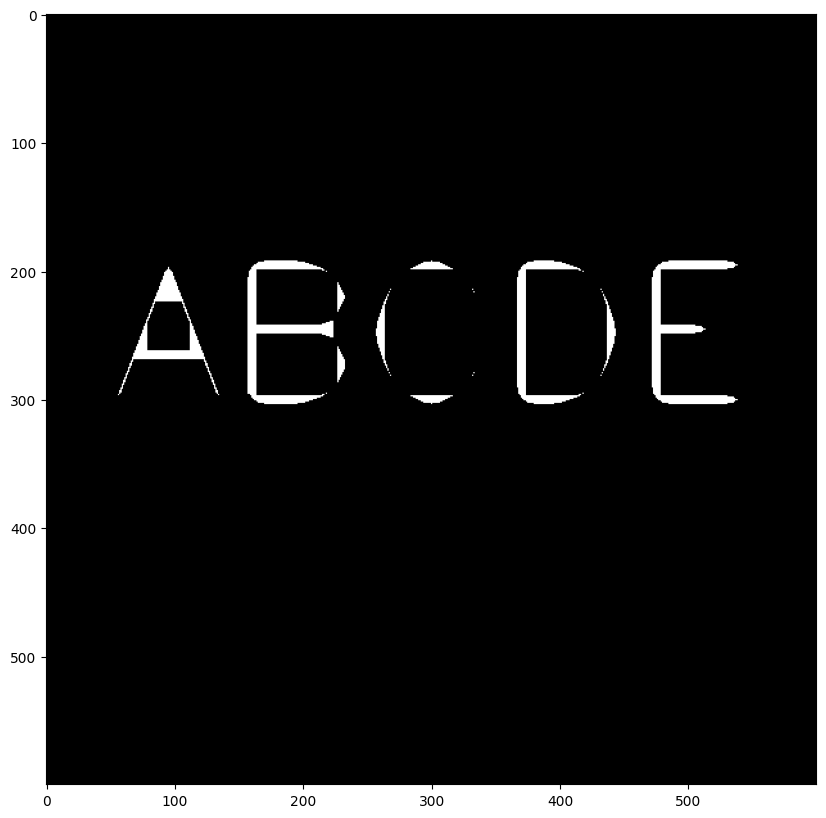

In [7]:
display_img(result)

In [8]:
img = load_img()

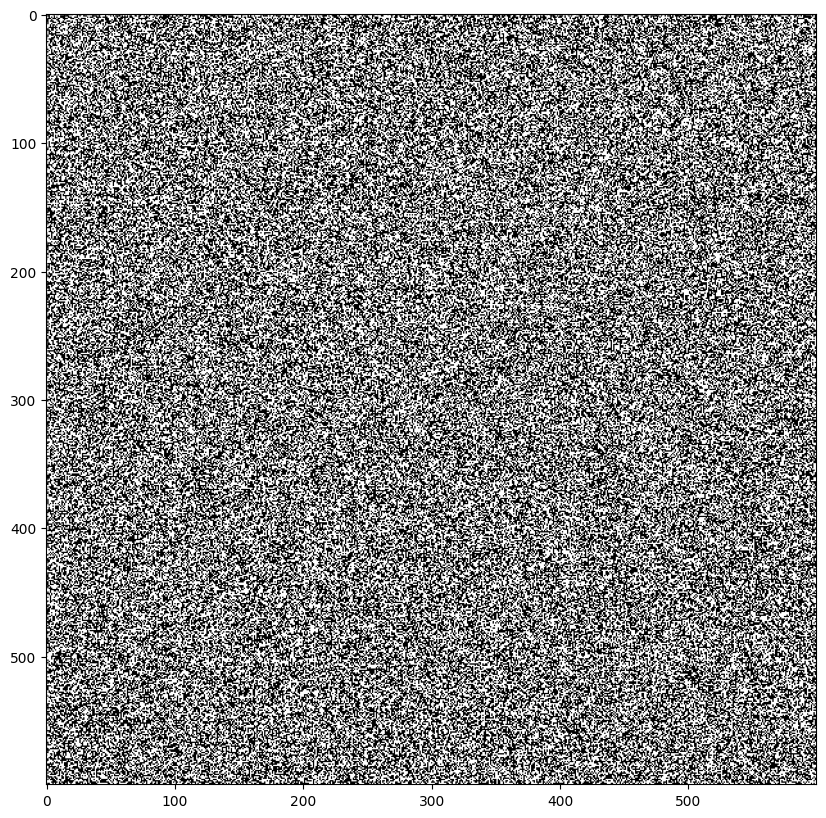

In [9]:
white_noise = np.random.randint(low=0, high=2,size=(600,600))
display_img(white_noise)

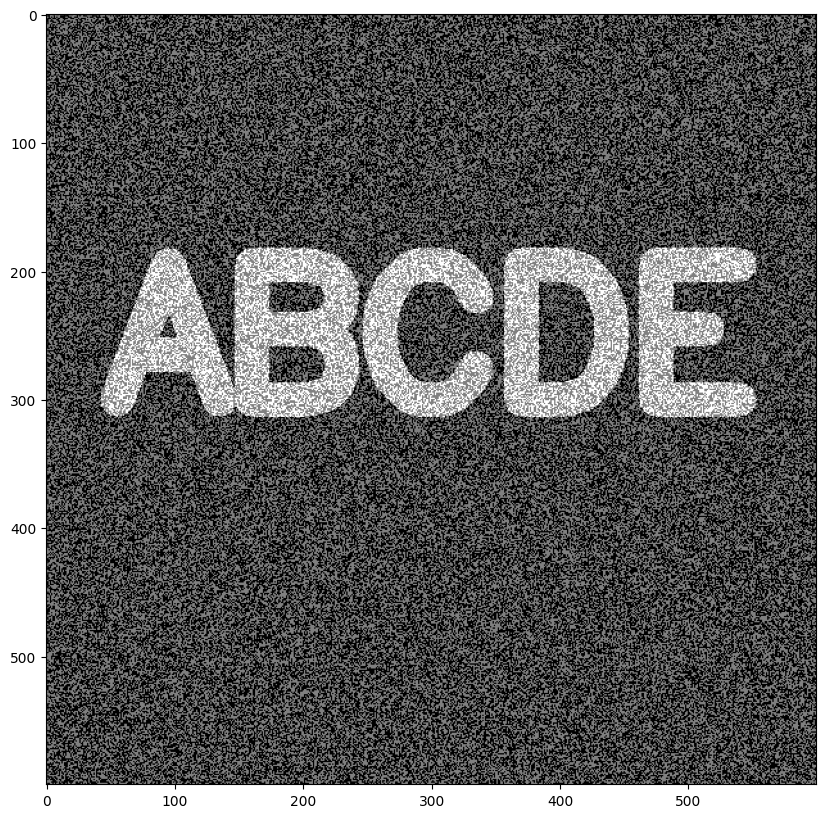

In [23]:
noise_img = (white_noise * 255) + img
display_img(noise_img)

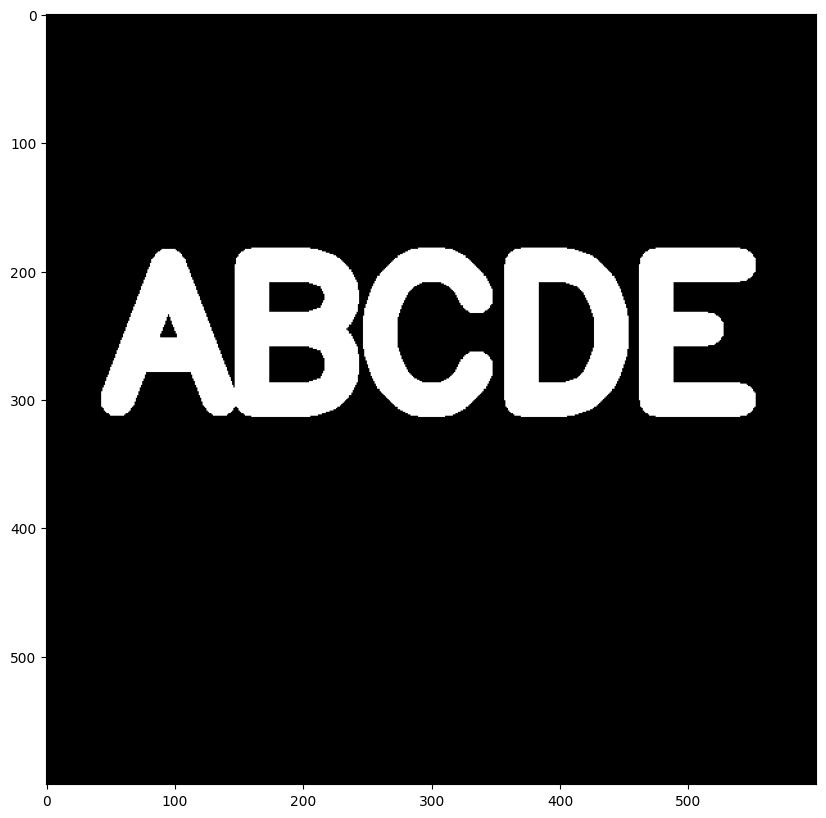

In [22]:
opening = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)
display_img(opening)

In [12]:
img = load_img()

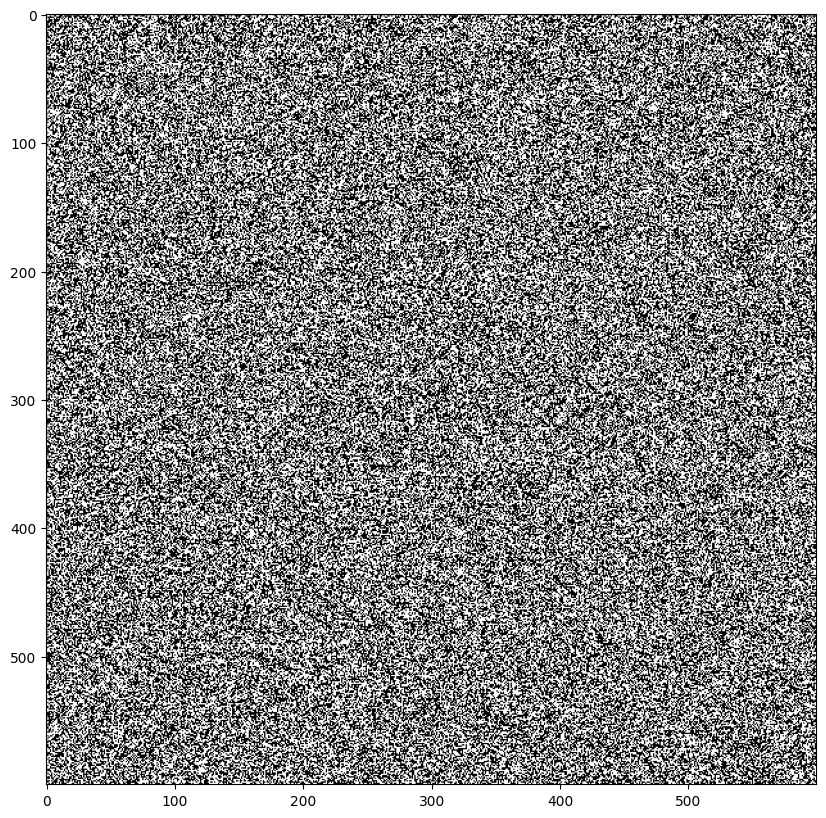

In [17]:
black_noise = np.random.randint(low=0, high=2, size=(600,600))
black_noise = black_noise * (-img.max())
display_img(black_noise)

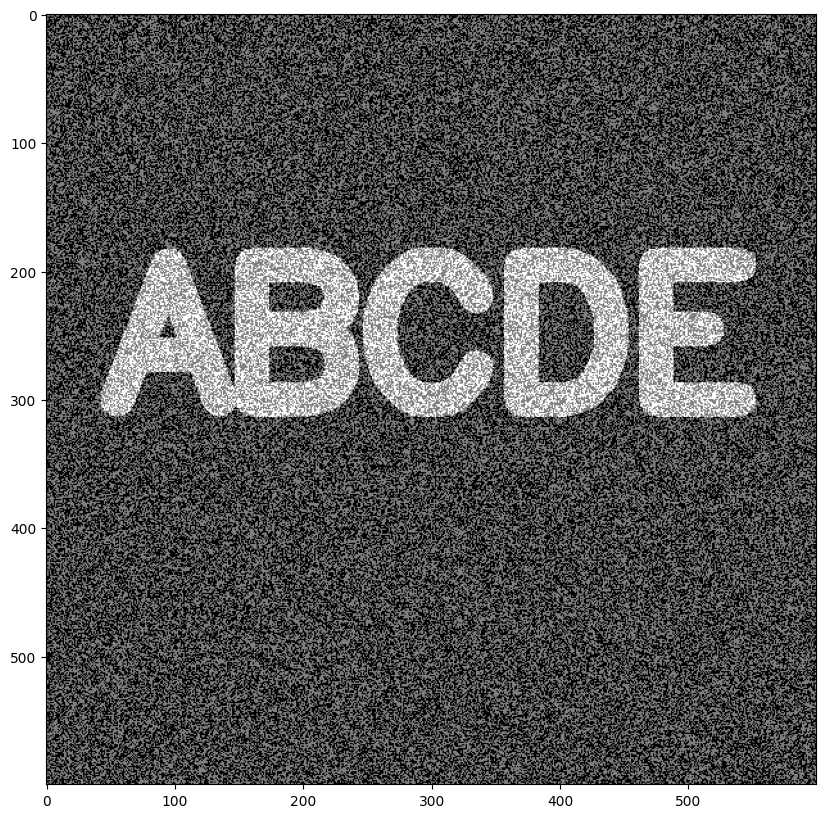

In [18]:
black_noise_img = black_noise + img
display_img(black_noise_img)

In [19]:
black_noise_img[black_noise_img == -255] = 0
black_noise_img.min()

np.float64(0.0)

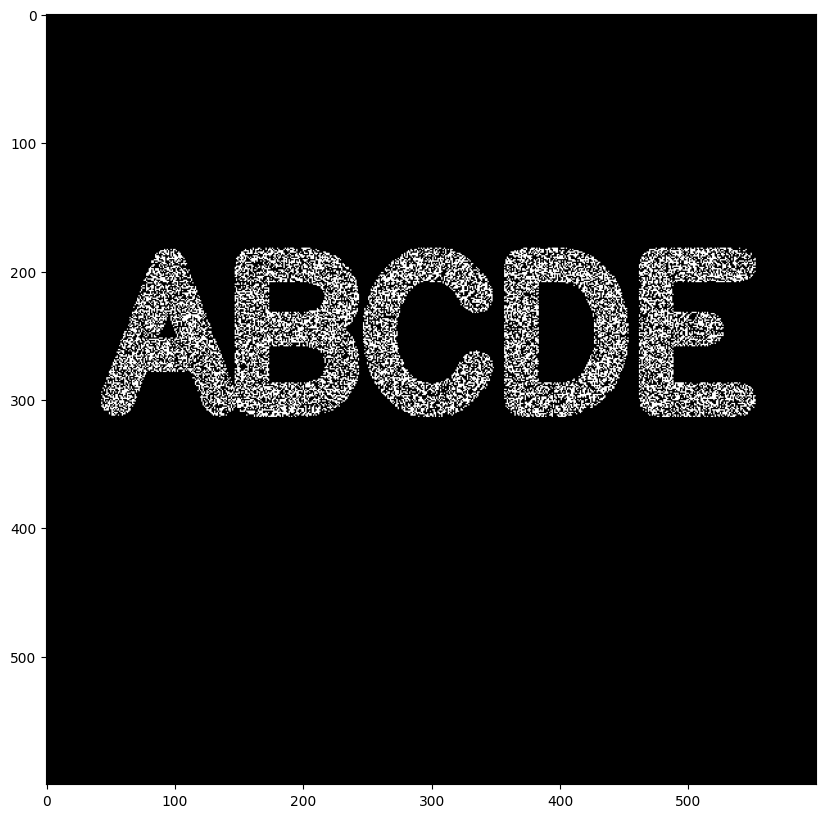

In [20]:
display_img(black_noise_img)

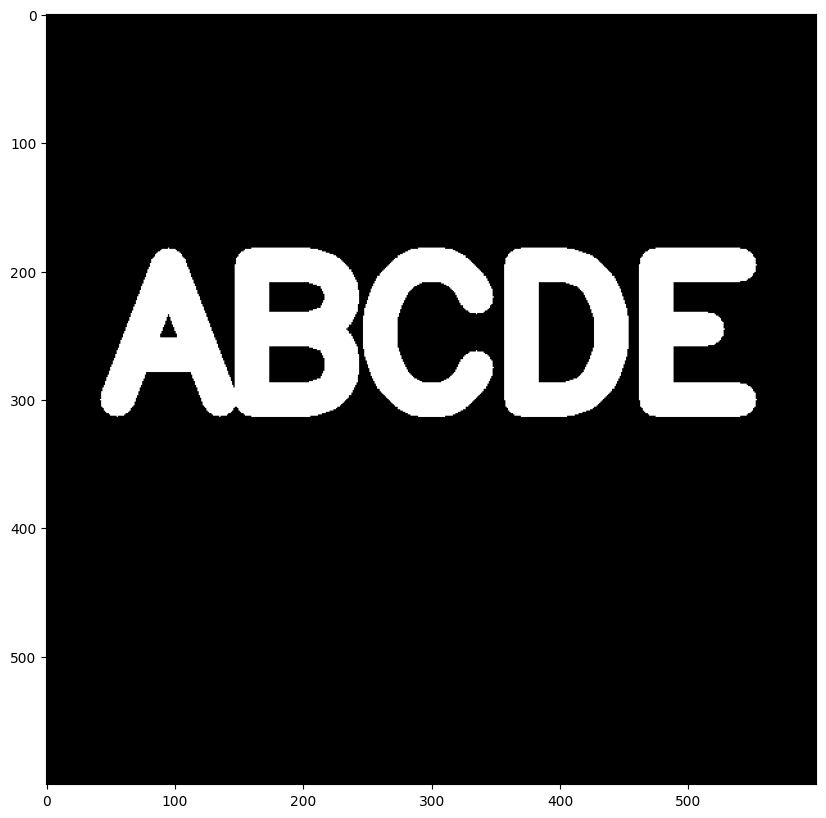

In [24]:
img = load_img()
display_img(img)

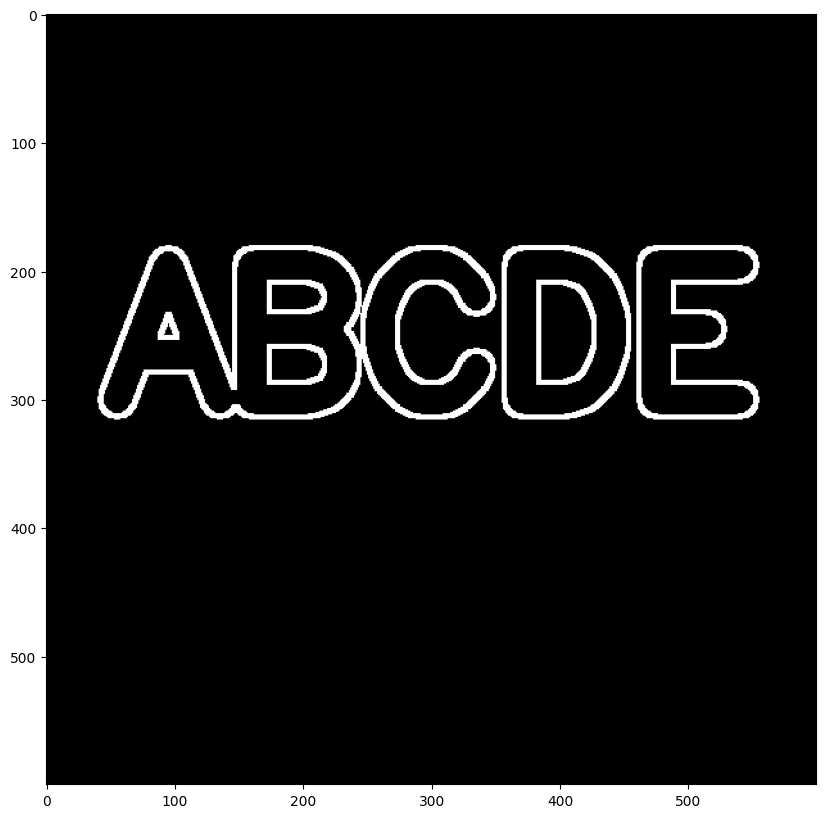

In [25]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)

In [26]:
def display_img(img):
    fig = plt.figure(figsize=(8,5))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

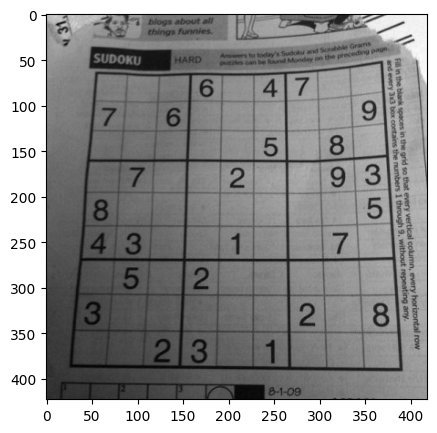

In [28]:
img = cv2.imread('../data/sudoku.jpg', 0) # 0 to be read in grayscale
display_img(img)

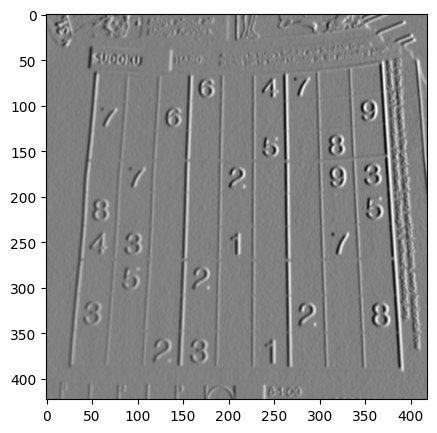

In [29]:
sobelx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
display_img(sobelx)

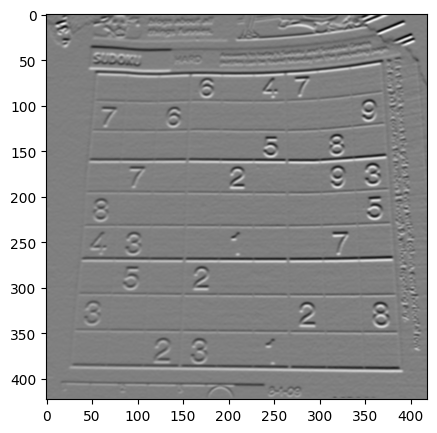

In [30]:
sobely = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
display_img(sobely)

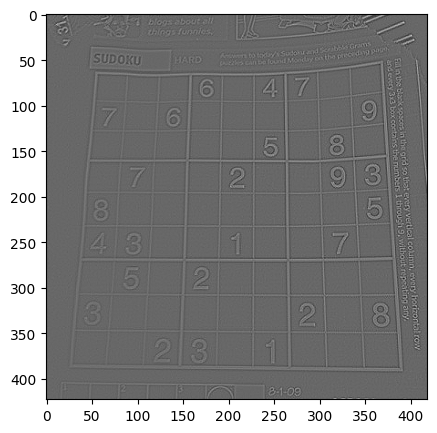

In [31]:
laplacian = cv2.Laplacian(img, ddepth=cv2.CV_64F)
display_img(laplacian)

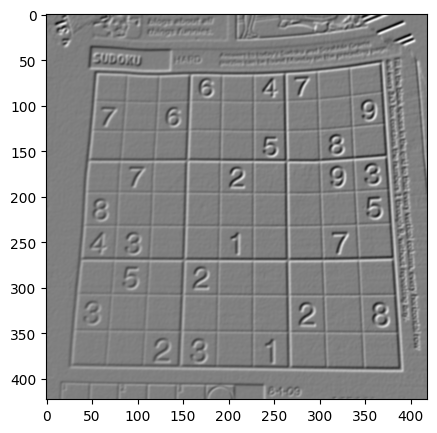

In [32]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)
display_img(blended)

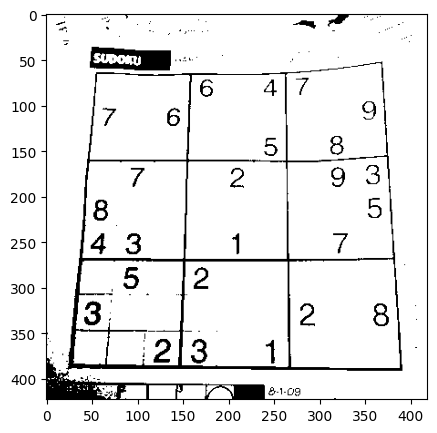

In [37]:
ret, th1 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
display_img(th1)

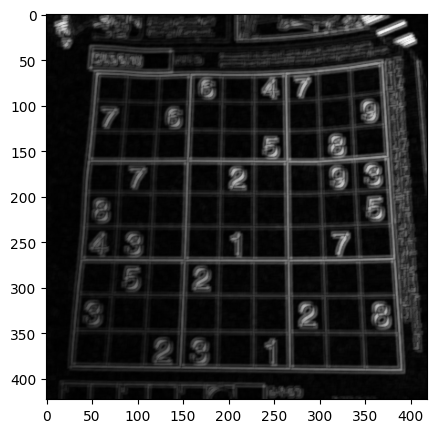

In [38]:
kernel = np.ones((4,4), np.uint8)
gradient = cv2.morphologyEx(blended, cv2.MORPH_GRADIENT, kernel)
display_img(gradient)